In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\mina nabil\AppData\Local\Temp\ipykernel_9580\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read data from CSV file
df = pd.read_csv("one-variable-data.csv", header=None, names=["Population", "Profit"])

# Display the first 10 rows of the dataframe
df.head(10)


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [3]:
# Display summary statistics of the dataframe
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


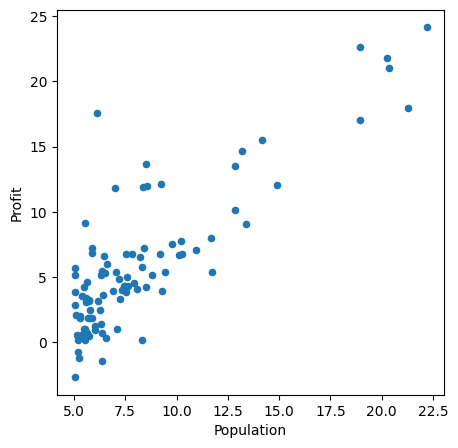

In [4]:
# Plot scatter plot of Population vs. Profit
df.plot(kind="scatter", x="Population", y="Profit", figsize=(5, 5))
plt.savefig("images/scatter_plot.png")

In [5]:
# Insert a column of ones for the intercept term in linear regression
df.insert(0, "Ones", 1)

In [6]:
# Get the number of columns
cols = df.shape[1]

# Separate features (X) and target variable (y)
X = df.iloc[:, :cols - 1]
y = df.iloc[:, cols - 1:cols]

In [7]:
# Convert X and y to numpy matrices
X = np.matrix(X)
y = np.matrix(y)

# Initialize theta (parameters) with zeros
Theta = np.matrix(np.array([0, 0, 0]))

In [8]:
# Function to compute cost for given X, y, and theta
def computecost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))

In [9]:
# Compute initial cost with initial theta values
computecost(X, y, Theta)

32.072733877455676

In [10]:
# Function to perform gradient descent to minimize cost function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computecost(X, y, theta)
    
    return theta, cost


In [11]:
# Set learning rate and number of iterations
alpha = 0.01
iters = 1000

# Perform gradient descent to fit the model parameters
theta_values, cost = gradientDescent(X, y, Theta, alpha, iters)


In [12]:
print(f"Theate values: {theta_values}")

Theate values: [[-3.24140214  1.1272942 ]]


In [13]:
# Generate a range of values for population for prediction
X = np.linspace(df.Population.min(), df.Population.max(), 100)

In [14]:
# Calculate predicted profit values using the model parameters
y_pred = theta_values[0, 0] + (theta_values[0, 1] * X)

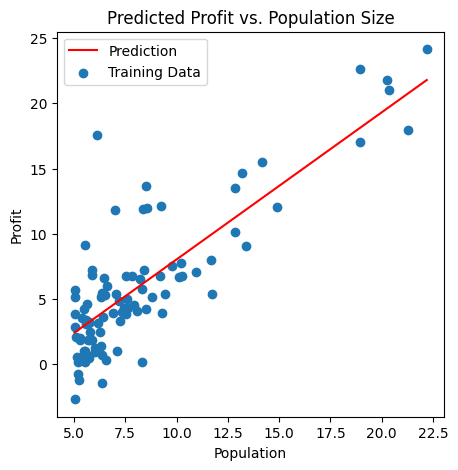

In [15]:
# Plot the fitted line along with the training data
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, y_pred, 'r', label='Prediction')
ax.scatter(df.Population, df.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.savefig("images/fitted_line.png")

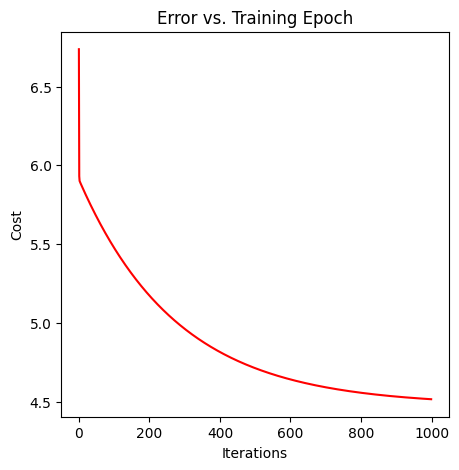

In [16]:
# Plot the cost function over iterations
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.savefig("images/cost_function.png")